### 🗺️ Explore: Variety in Netflix's Offering
To explore the variety in Netflix's offering based on type, country, and genres (listed_in), I'll analyze the data and make a wordcloud based on the frequency of words in the description

[nltk_data] Downloading package punkt to /Users/shivam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


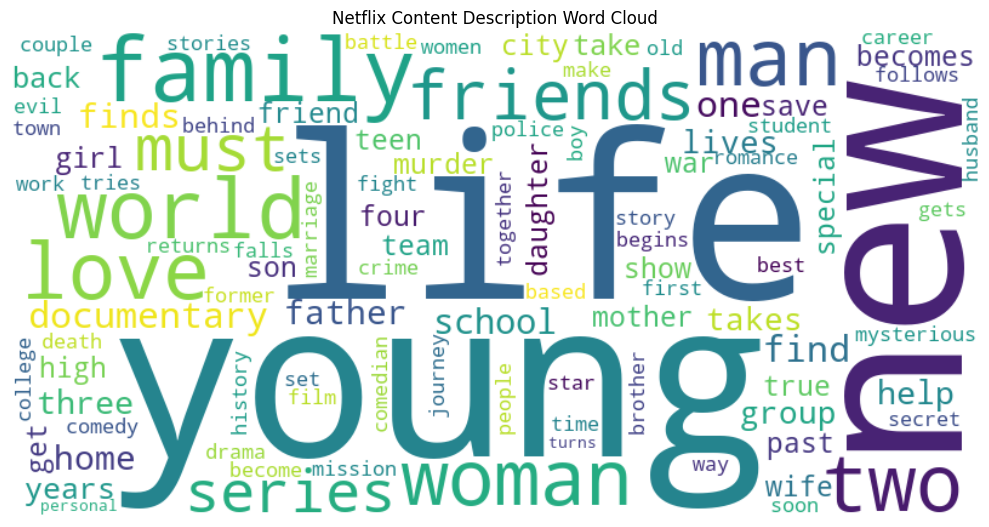

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv('netflix_titles.csv')

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Process the descriptions
stop_words = set(stopwords.words('english'))
all_words = []

for desc in df['description']:
    # Convert to lowercase and tokenize
    words = word_tokenize(desc.lower())
    
    # Remove stop words and punctuation
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    
    all_words.extend(filtered_words)

# Count word frequencies
word_counts = Counter(all_words)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      max_words=100, colormap='viridis').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Content Description Word Cloud')
plt.tight_layout()
plt.show()

### 🔎 Analyze: Genre and Rating Trends
To analyze whether Netflix has invested more in certain genres or age ratings in recent years

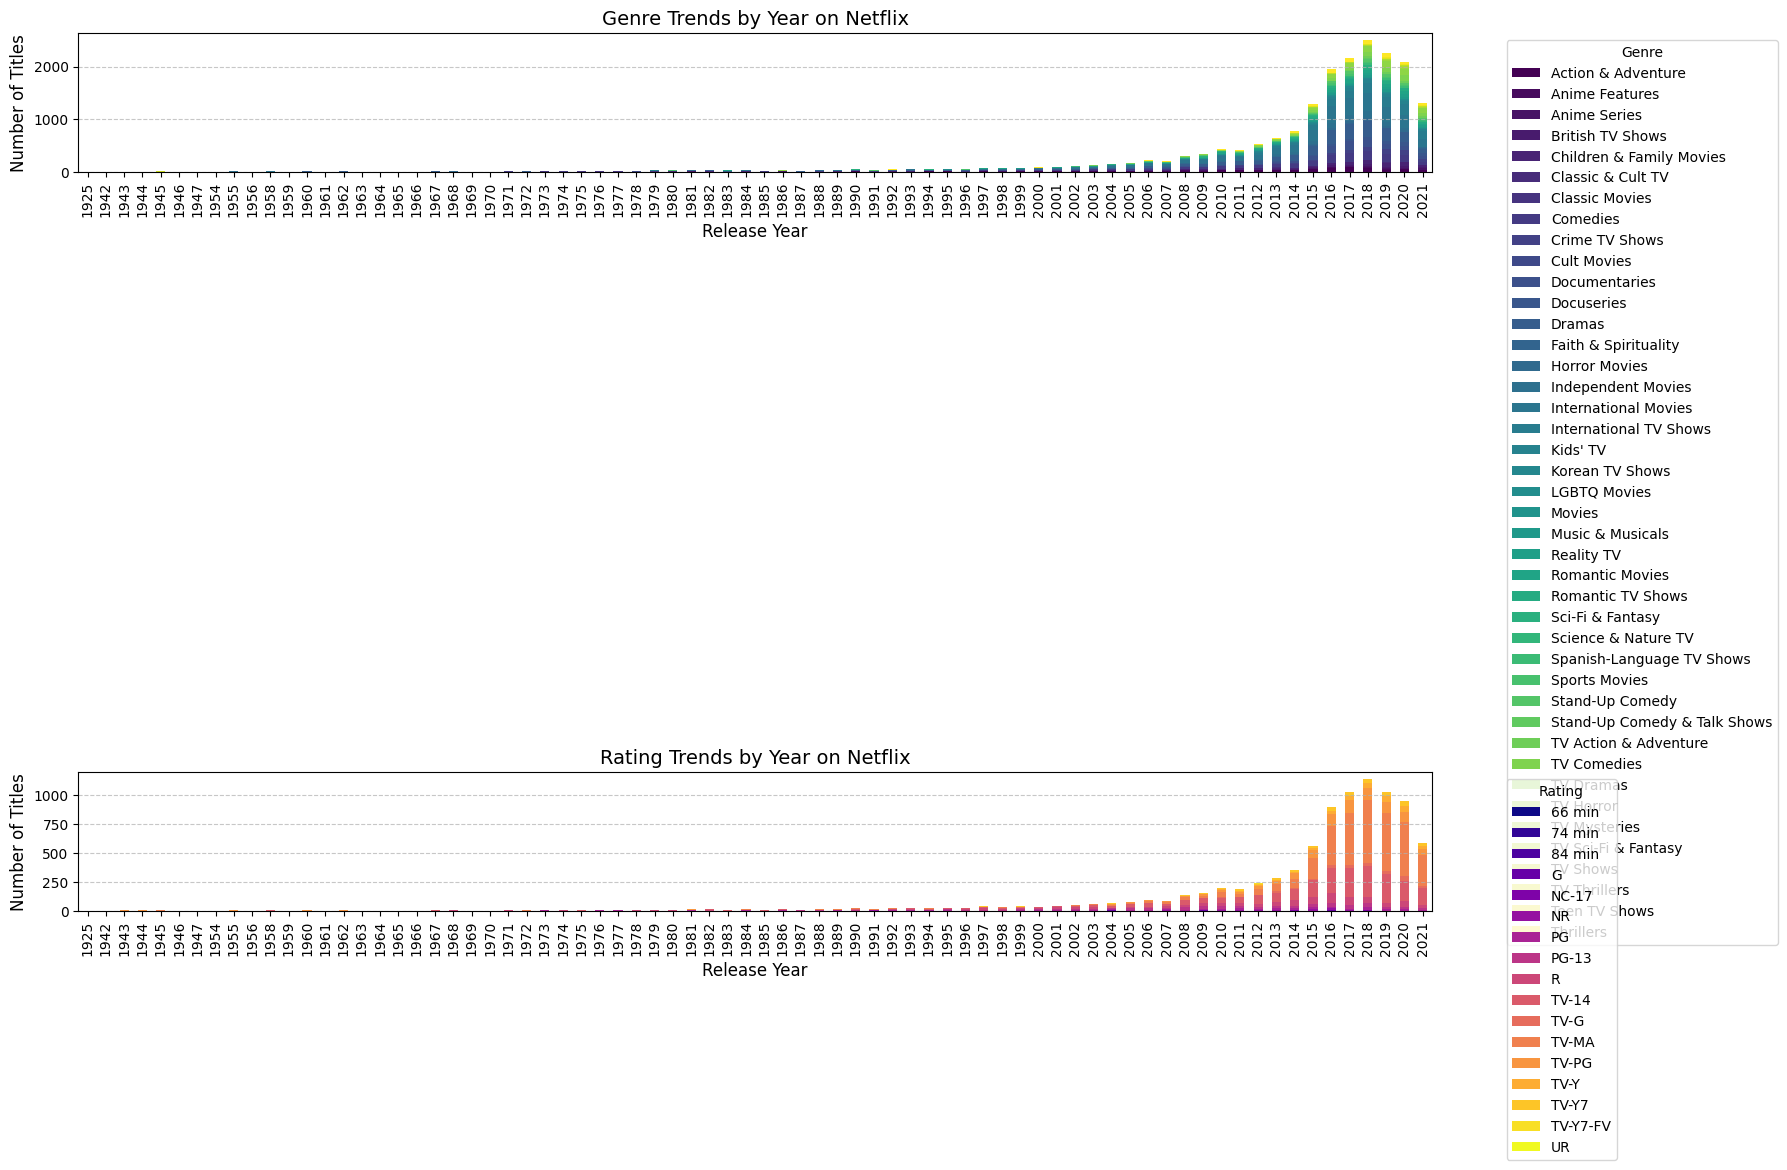


Age rating distribution by year:
rating        66 min    74 min  84 min         G     NC-17        NR  \
release_year                                                           
1925             0.0  0.000000     0.0  0.000000  0.000000  0.000000   
1942             0.0  0.000000     0.0  0.000000  0.000000  0.000000   
1943             0.0  0.000000     0.0  0.000000  0.000000  0.000000   
1944             0.0  0.000000     0.0  0.000000  0.000000  0.000000   
1945             0.0  0.000000     0.0  0.000000  0.000000  0.000000   
...              ...       ...     ...       ...       ...       ...   
2017             0.0  0.096993     0.0  0.096993  0.000000  0.193986   
2018             0.0  0.000000     0.0  0.174368  0.087184  0.087184   
2019             0.0  0.000000     0.0  0.097087  0.000000  0.000000   
2020             0.0  0.000000     0.0  0.104932  0.000000  0.000000   
2021             0.0  0.000000     0.0  0.000000  0.000000  0.000000   

rating              PG     PG

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

df = pd.read_csv('netflix_titles.csv')

# STEP 1: Extract and explode genres
# Each title can have multiple genres listed in 'listed_in'
df_genres = df.copy()
df_genres['genre'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('genre')

# STEP 2: Analyze genre trends over years
# Count content by genre and year
genre_year_counts = df_genres.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Pivot the data for plotting
genre_pivot = genre_year_counts.pivot(index='release_year', columns='genre', values='count').fillna(0)

# STEP 3: Analyze rating trends over years
rating_year_counts = df.groupby(['release_year', 'rating']).size().reset_index(name='count')
rating_pivot = rating_year_counts.pivot(index='release_year', columns='rating', values='count').fillna(0)

# STEP 4: Plot the results
plt.figure(figsize=(18, 10))

# Plot genre trends
plt.subplot(2, 1, 1)
genre_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Genre Trends by Year on Netflix', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot rating trends
plt.subplot(2, 1, 2)
rating_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='plasma')
plt.title('Rating Trends by Year on Netflix', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# STEP 5: Calculate percentage change over the years to identify growing genres
# Group by year and genre
genre_by_year = df_genres.groupby(['release_year', 'genre']).size().unstack().fillna(0)

# STEP 6: Analyze content targeting by age rating
print("\nAge rating distribution by year:")
yearly_rating_dist = df.groupby('release_year')['rating'].value_counts(normalize=True).unstack().fillna(0) * 100
print(yearly_rating_dist)

# STEP 7: Find correlation between genres and ratings
# Create a contingency table of genre vs. rating
genre_rating = pd.crosstab(df_genres['genre'], df_genres['rating'], normalize='index') * 100
print("\nPercentage of titles by genre and rating:")
print(genre_rating)

# STEP 8: Additional analysis for the full dataset

# Find fastest growing genres in the most recent 3 years
recent_years = sorted(df['release_year'].unique())[-3:]
recent_df = df_genres[df_genres['release_year'].isin(recent_years)]
recent_growth = recent_df.groupby(['release_year', 'genre']).size().unstack().fillna(0)
recent_growth_pct = recent_growth.pct_change(periods=1) * 100

# Identify genres Netflix is investing more in
print("\nFastest growing genres in recent years:")
for year in recent_growth_pct.index[1:]:  # Skip first year as it has no growth calculation
    year_growth = recent_growth_pct.loc[year].sort_values(ascending=False)
    print(f"\nYear {year}:")
    for genre, growth in year_growth.items():
        if not pd.isna(growth) and growth > 0:
            print(f"{genre}: +{growth:.1f}%")


### Network Graph
Task: A talent agency has hired you to analyze patterns in the professional relationships of cast members and directors. The key deliverable is a network graph where each node represents a cast member or director. An edge represents a movie or TV show worked on by both nodes in this undirected graph. You can limit the actors to the first four names listed in cast. The client is interested in any insights you can derive from your Netflix network analysis, such as actor/actor and actor/director pairs that work most closely together, most popular actors and directors to work with, and graph differences over time.

Network has 21453 nodes and 57685 edges

Top collaborative pairs:
Ama Qamata and Khosi Ngema: 1 collaborations
Ama Qamata and Gail Mabalane: 1 collaborations
Ama Qamata and Thabang Molaba: 1 collaborations
Gail Mabalane and Khosi Ngema: 1 collaborations
Khosi Ngema and Thabang Molaba: 1 collaborations

Most connected individuals:
Shah Rukh Khan: 0.0048
Akshay Kumar: 0.0042
Amitabh Bachchan: 0.0038
Anupam Kher: 0.0036
Kareena Kapoor: 0.0034


/var/folders/s8/l257wfq948lf2yt1ypjy2k740000gn/T/ipykernel_31958/68796821.py:102: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  plt.savefig('netflix_network.png', dpi=300)  # Save before showing
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


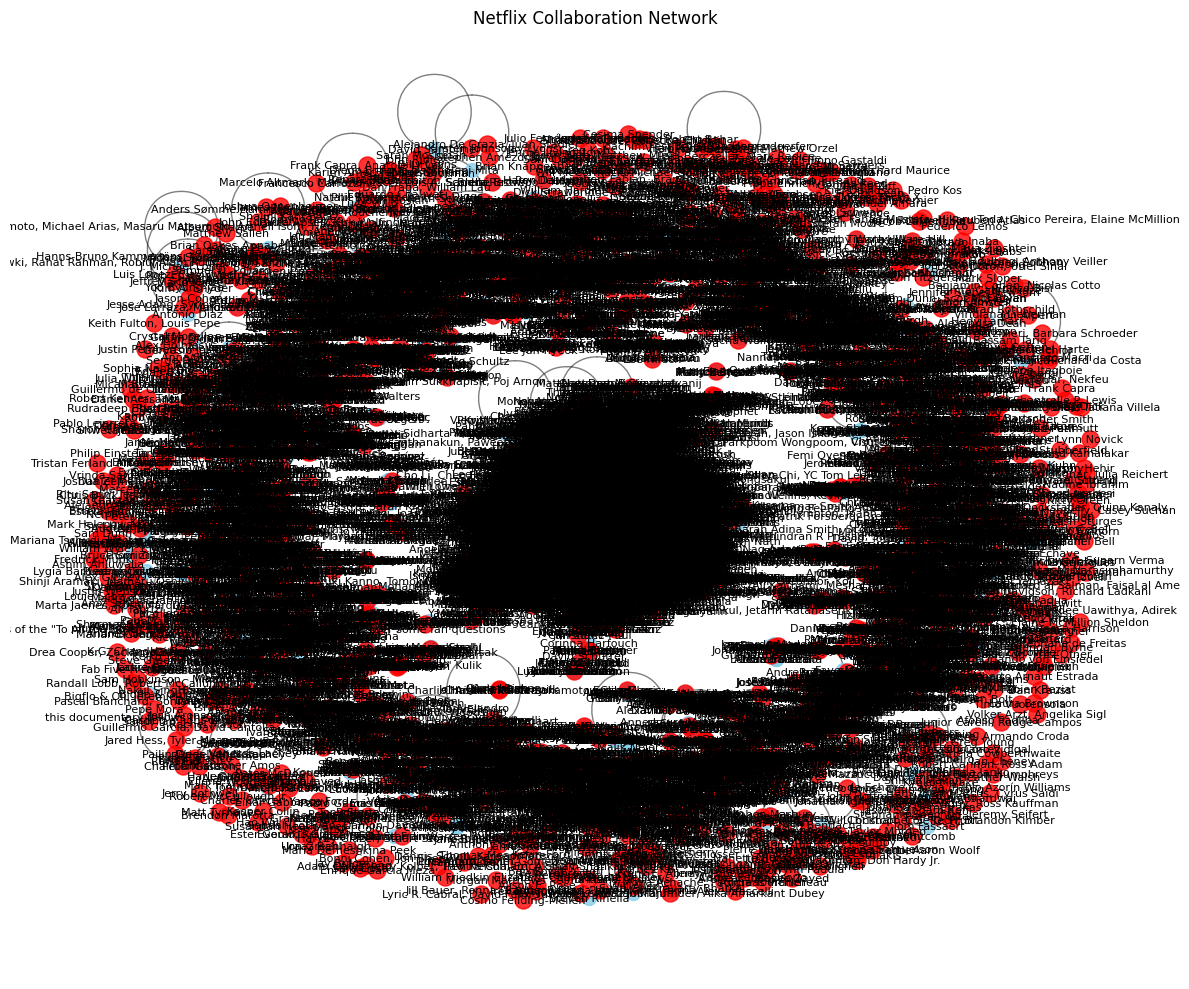


Year 1942: 3 nodes, 3 edges

Year 1944: 2 nodes, 1 edges

Year 1945: 3 nodes, 3 edges

Year 1946: 2 nodes, 1 edges

Year 1947: 3 nodes, 3 edges

Year 1954: 10 nodes, 20 edges

Year 1955: 12 nodes, 27 edges

Year 1956: 10 nodes, 17 edges

Year 1958: 14 nodes, 26 edges

Year 1959: 5 nodes, 10 edges

Year 1960: 19 nodes, 40 edges

Year 1961: 5 nodes, 10 edges

Year 1962: 15 nodes, 29 edges

Year 1963: 5 nodes, 10 edges

Year 1964: 9 nodes, 17 edges

Year 1965: 10 nodes, 20 edges

Year 1966: 5 nodes, 9 edges

Year 1967: 24 nodes, 46 edges

Year 1968: 15 nodes, 30 edges

Year 1969: 10 nodes, 20 edges

Year 1970: 10 nodes, 20 edges

Year 1971: 24 nodes, 50 edges

Year 1972: 19 nodes, 39 edges

Year 1973: 49 nodes, 92 edges

Year 1974: 29 nodes, 57 edges

Year 1975: 35 nodes, 63 edges

Year 1976: 36 nodes, 66 edges

Year 1977: 29 nodes, 54 edges

Year 1978: 34 nodes, 63 edges

Year 1979: 41 nodes, 68 edges

Year 1980: 52 nodes, 97 edges

Year 1981: 58 nodes, 108 edges

Year 1982: 67 nodes, 1

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the Netflix data
df = pd.read_csv('netflix_titles.csv')

# Function to clean special characters that might cause matplotlib errors
def clean_text(text):
    if pd.isna(text):
        return text
    # Escape special characters like $, _, ^, etc.
    text = re.sub(r'([\$_\^])', r'\\\1', text)
    return text

# Clean the text columns to prevent matplotlib errors
df['director'] = df['director'].apply(clean_text)
df['cast'] = df['cast'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)

# Create a network graph
G = nx.Graph()

# Process each show/movie
for _, row in df.iterrows():
    # Get director and cast
    director = row['director']
    cast_str = row['cast']
    
    # Skip if both director and cast are empty
    if pd.isna(director) and (pd.isna(cast_str) or cast_str == ""):
        continue
    
    # Process cast
    cast = []
    if not pd.isna(cast_str) and cast_str != "":
        cast = [name.strip() for name in cast_str.split(',')]
        # Limit to first 4 cast members as per requirements
        cast = cast[:4]
    
    # Add director node if it exists
    if not pd.isna(director) and director != "":
        G.add_node(director, type='director')
        
        # Connect director to each cast member
        for actor in cast:
            G.add_node(actor, type='actor')
            G.add_edge(director, actor, title=row['title'], year=row['release_year'])
    
    # Connect cast members to each other
    for i in range(len(cast)):
        for j in range(i+1, len(cast)):
            G.add_edge(cast[i], cast[j], title=row['title'], year=row['release_year'])

# Analyze the network
print(f"Network has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# Find most collaborative pairs
collaboration_counts = {}
for u, v, data in G.edges(data=True):
    pair = tuple(sorted([u, v]))
    if pair in collaboration_counts:
        collaboration_counts[pair] += 1
    else:
        collaboration_counts[pair] = 1

# Most frequent collaborations
top_collaborations = sorted(collaboration_counts.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop collaborative pairs:")
for pair, count in top_collaborations:
    print(f"{pair[0]} and {pair[1]}: {count} collaborations")

# Calculate degree centrality to find most "popular" people to work with
degree_centrality = nx.degree_centrality(G)
top_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nMost connected individuals:")
for person, centrality in top_centrality:
    print(f"{person}: {centrality:.4f}")

# Disable math rendering to avoid issues with special characters
plt.rcParams['text.usetex'] = False
plt.rcParams['text.parse_math'] = False

# Visualize the network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using Fruchterman-Reingold force-directed algorithm

# Draw nodes with different colors for actors and directors
actor_nodes = [node for node, attr in G.nodes(data=True) if attr.get('type', '') == 'actor']
director_nodes = [node for node, attr in G.nodes(data=True) if attr.get('type', '') == 'director']

nx.draw_networkx_nodes(G, pos, nodelist=actor_nodes, node_color='skyblue', node_size=100, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=director_nodes, node_color='red', node_size=150, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Netflix Collaboration Network")
plt.axis('off')
plt.tight_layout()
plt.savefig('netflix_network.png', dpi=300)  # Save before showing
plt.show()

# Time-based analysis
# Create subgraphs by year
years = sorted(set(data['year'] for u, v, data in G.edges(data=True) if 'year' in data))
for year in years:
    year_edges = [(u, v) for u, v, data in G.edges(data=True) if 'year' in data and data['year'] == year]
    subgraph = G.edge_subgraph(year_edges)
    print(f"\nYear {year}: {subgraph.number_of_nodes()} nodes, {subgraph.number_of_edges()} edges")

# Optional: Generate additional insights from the network
print("\nNetwork Metrics:")
print(f"Network Density: {nx.density(G):.6f}")
print(f"Average Clustering Coefficient: {nx.average_clustering(G):.6f}")

# Find communities in the network
try:
    from community import community_louvain
    partition = community_louvain.best_partition(G)
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)
    
    # Print the largest communities
    print("\nLargest communities in the network:")
    for comm_id, members in sorted(communities.items(), key=lambda x: len(x[1]), reverse=True)[:3]:
        print(f"Community {comm_id}: {len(members)} members")
        # Print a few example members
        print(f"Example members: {', '.join(members[:5])}")
except ImportError:
    print("\nCommunity detection requires python-louvain package. Install with: pip install python-louvain")